Neural Networks
===============
Neural networks were originally inspired by the human brain.
The brain is composed of billions of highly interconnected neurons that are responsible for processing and transmitting information. Each neuron is connected to thousands of other neurons, and the strength of these connections can change over time. This is how we learn and adapt to new situations.

Artificial neural networks are a simplified model of the brain. They are composed of layers of artificial neurons that are connected to each other. Each connection has a weight associated with it, which determines how strongly one neuron influences another. These weights are adjusted during training, so that the network learns to map inputs to outputs correctly.

In many areas, the amount of digital data has grown rapidly in recent years. This has created a need for more powerful algorithms that can process this data efficiently, leading to a resurgence of interest in neural networks.

Each neuron in a neural network computes a weighted sum of its inputs, adds a bias term, and then applies an activation function to the result. The weights and biases are learned during training, while the activation function is usually chosen in advance.

Neural Network Model
=====================
A neural network is composed of layers of neurons that are connected to each other. The first layer is called the input layer, and the last layer is called the output layer. There can be one or more layers in between, which are called hidden layers.

Each neuron is a little computational unit that uses its own activation function to process its inputs. The most commonly used activation function is the sigmoid function, which maps any real number to the range [0, 1].

Let's take a closer look at a certain layer in a network:
Suppose layer 3 of a network, which has 4 neurons, is connected to layer 2, which has 3 neurons. The weights and biases of the connections are stored in matrices W3 and b3, respectively. The inputs to layer 3 are stored in a vector a2.

The output of layer 3 is computed as follows:
a[3] = sigmoid(W[3] * a[2] + b[3])
Here, the multiplication W[3] * a[2] is a matrix-vector product, and the addition b[3] is a vector addition. The sigmoid function is applied element-wise to the result.
So the general formula to calculate the activation value of a neuron is:
a = g(W * x + b), where g is the activation function.

Note: the input and output of each layer is a vector.

Forward Propagation: The process of computing the output of a neural network for a given input is called forward propagation. It involves passing the input through each layer, applying the activation function, and computing the output.

Here, we will explore the basics of neurons and layers in a neural network.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

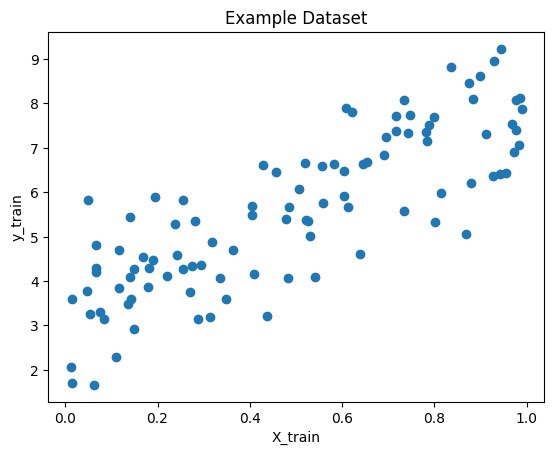

In [54]:
# Let's use an example dataset
X_train = np.random.rand(100, 1)
y_train = 5 * X_train + 3 + np.random.randn(100, 1)

plt.scatter(X_train, y_train)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Example Dataset')
plt.show()

A neuron with no activation is just linear regression.
First, implement a simple linear regression model using NumPy.

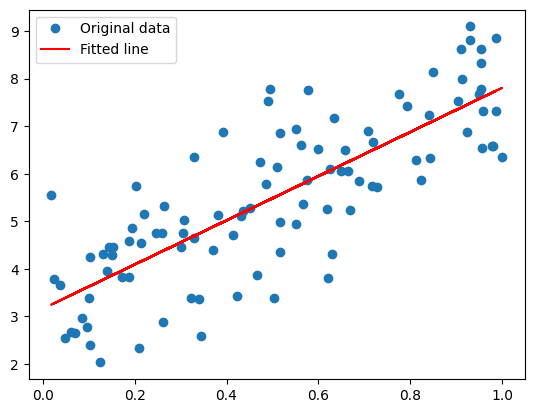

In [44]:
def linear_regression(X, y):
    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

X_train = X_train.reshape(-1)
y_train = y_train.reshape(-1)
m, c = linear_regression(X_train, y_train)

# Plot the data and the linear regression line
plt.plot(X_train, y_train, 'o', label='Original data')
plt.plot(X_train, m*X_train + c, 'r', label='Fitted line')
plt.legend()
plt.show()

Next, we implement logistic regression for binary classification problems.

In [45]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        return sigmoid(np.dot(X, self.theta)) >= 0.5

We now build a neural network layer using Keras and compare it to our logistic regression model.

In [55]:
model = Sequential([
    Dense(1, input_shape=(1,), activation='sigmoid')
])

# Set known weights and biases
set_w = np.array([[2]])
set_b = np.array([-4.5])
model.layers[0].set_weights([set_w, set_b])

print("Weights and biases:", model.layers[0].get_weights())

Weights and biases: [array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


We compare the output of the logistic layer with the manually calculated output.

In [56]:
X_train = np.array([1.0]).reshape(1, 1)

# Keras model prediction
a1 = model.predict(X_train)
print("Keras model output:", a1)

# Manual calculation
alog = sigmoid(np.dot(set_w, X_train) + set_b)
print("Manual calculation output:", alog)

1/1 [==============================] - 0s 64ms/step
Keras model output: [[0.07585818]]
Manual calculation output: [[0.07585818]]


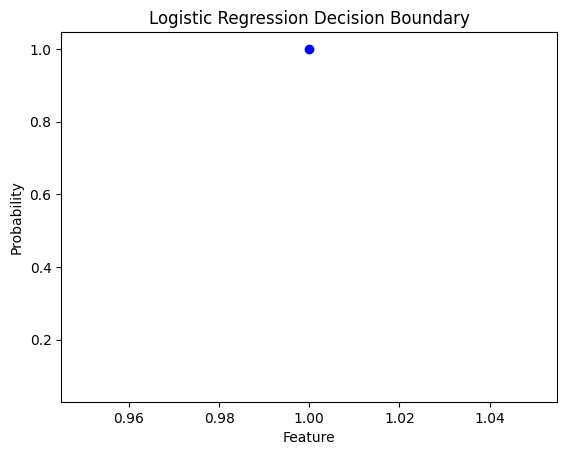

In [58]:
def plt_logistic(X_train, Y_train, set_w, set_b):
    plt.scatter(X_train, Y_train, marker='o', c='blue')
    x_values = np.linspace(min(X_train), max(X_train), 100)
    y_values = sigmoid(set_w * x_values + set_b)
    plt.plot(x_values, y_values, 'r')
    plt.xlabel('Feature')
    plt.ylabel('Probability')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# Example usage
plt_logistic(X_train, np.array([1]), set_w, set_b)

So, a neuron is essentially a linear regression model with an activation function.
Let's see a simple model of a neuron.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def forward(self, inputs):
        # Linear combination
        z = np.dot(self.weights, inputs) + self.bias
        # Activation
        return sigmoid(z)

# Example usage
weights = [0.5, -0.6, 0.1]  # example weights
bias = 0.2  # example bias
neuron = Neuron(weights, bias)

inputs = [1.0, 2.0, -1.0]  # example inputs
output = neuron.forward(inputs)

print("Output:", output)

Output: 0.3543436937742046


Data in Tensorflow
==================
Why do we have to give vectors to tensorflow in the form of 2D arrays?
The convention in numpy is to have 1D arrays for vectors, but in tensorflow, the convention is to have 2D matrices. This is because tensorflow is designed to work with batches of data, and using 2D arrays makes it easier to handle both single samples and batches of samples.
What is a Tensor? A tensor is a generalization of vectors and matrices to potentially higher dimensions. In tensorflow, tensors are the main objects that are passed around and operated on. Each tensor has a data type and a shape.

So the takeaway is that when working with arrays in numpy and tensorflow, beware that the shapes might be different, due to tensorflow converting arrays to tensors.

Neural Network in Tensorflow
============================
Now, let's build a simple neural network using tensorflow.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization

In [4]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Variable1', 'Variable2'])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())

   Variable1  Variable2  Target
0   0.204760  -0.357665       0
1  -1.381197   1.390041       0
2   0.564351   0.467320       1
3   1.130436   0.496788       1
4   0.230647  -0.344902       0


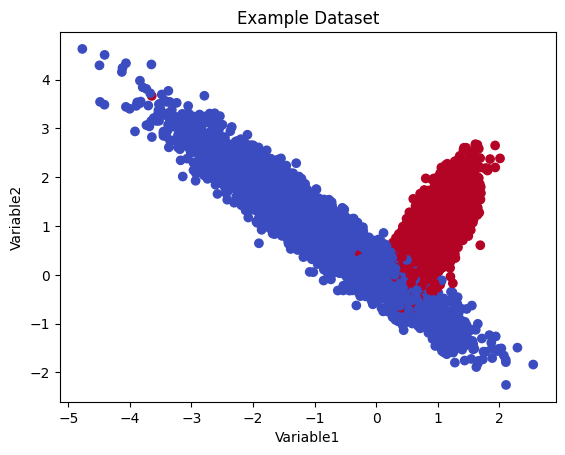

In [5]:
# Plot the dataset
plt.scatter(df['Variable1'], df['Variable2'], c=df['Target'], cmap='coolwarm')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.title('Example Dataset')
plt.show()

In [6]:
# Normalize the data using keras
normalizer = Normalization(axis=-1)
normalizer.adapt(X) # Compute the mean and variance
X_normalized = normalizer(X) # Normalize the data

In [7]:
tf.random.set_seed(42)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(4, activation='sigmoid', name='hidden_layer'),
        Dense(1, activation='sigmoid', name='output_layer')
    ]
)

Note: tf.keras.input() is usually not needed, as the input shape is automatically inferred from the data. However, it is used here to make the input shape explicit.

Note2: Using sigmoid activation function in the output layer is not recommended for classification problems. It is used here for demonstration purposes only. More on that later.

We can visualize the model using the summary() method.

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Let's check the numbers in the summary
# Number of parameters in the hidden layer
hidden_layer_params = 2 * 4 + 4  # input_shape * output_shape + output_shape
print("Hidden layer parameters:", hidden_layer_params)
# Number of parameters in the output layer
output_layer_params = 4 * 1 + 1  # input_shape * output_shape + output_shape
print("Output layer parameters:", output_layer_params)

Hidden layer parameters: 12
Output layer parameters: 5


Let's examine the weights and biases of the model.

In [9]:
# Get the weights and biases of the hidden layer
hidden_layer = model.get_layer('hidden_layer')
hidden_weights, hidden_biases = hidden_layer.get_weights()
print("Hidden layer weights:", hidden_weights)
print("Hidden layer biases:", hidden_biases)
# Get the weights and biases of the output layer
output_layer = model.get_layer('output_layer')
output_weights, output_biases = output_layer.get_weights()
print("Output layer weights:", output_weights)
print("Output layer biases:", output_biases)

Hidden layer weights: [[ 0.14791751  0.27641058 -0.3497343  -0.05943537]
 [-0.5452404  -0.40234995  0.5130503   0.04841924]]
Hidden layer biases: [0. 0. 0. 0.]
Output layer weights: [[-0.2806667 ]
 [ 0.58844495]
 [ 0.38972664]
 [ 0.63661826]]
Output layer biases: [0.]


As you can see, the shape of the weights matrix is (input_shape, units) and the shape of the bias vector is (units).

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_normalized, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5143 - loss: 0.7134 - val_accuracy: 0.5050 - val_loss: 0.6614
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5981 - loss: 0.6466 - val_accuracy: 0.9315 - val_loss: 0.6054
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.5868 - val_accuracy: 0.9555 - val_loss: 0.5309
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9526 - loss: 0.5085 - val_accuracy: 0.9685 - val_loss: 0.4472
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.4246 - val_accuracy: 0.9745 - val_loss: 0.3685
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.3483 - val_accuracy: 0.9770 - val_loss: 0.3024
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.2855 - val_accuracy: 0.9765 - val_loss: 0.2502
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.2366 - val_accuracy: 0.

Epochs: One epoch is one complete pass through the training data. During training, the model is fit to the training data in multiple iterations, which are called epochs. The number of epochs is a hyperparameter that determines how many times the model will be trained on the data.

Batch size: The batch size is the number of samples that are processed at a time by the model. The model's weights are updated after each batch. The batch size is another hyperparameter that affects the training process. By default, Keras uses a batch size of 32.

In [12]:
# Let's see the updated weights
# Get the weights and biases of the hidden layer
hidden_layer = model.get_layer('hidden_layer')
hidden_weights, hidden_biases = hidden_layer.get_weights()
print("Hidden layer weights:", hidden_weights)
print("Hidden layer biases:", hidden_biases)
# Get the weights and biases of the output layer
output_layer = model.get_layer('output_layer')
output_weights, output_biases = output_layer.get_weights()
print("Output layer weights:", output_weights)
print("Output layer biases:", output_biases)

Hidden layer weights: [[-2.0860188   2.3123052   1.5573045   1.9119991 ]
 [-0.903452    0.9169834   0.68283737  0.7882328 ]]
Hidden layer biases: [ 0.23313324 -0.20759378 -0.3464384  -0.2637894 ]
Output layer weights: [[-2.2431195 ]
 [ 2.1986952 ]
 [ 0.82440776]
 [ 1.8606007 ]]
Output layer biases: [-0.81457835]


And now, let's visualize the training process.

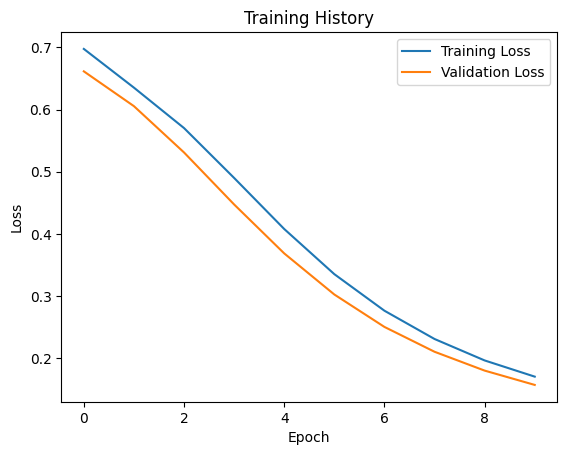

In [13]:
# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

In [14]:
# making predictions
y_pred = model.predict(X_normalized)
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]


In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_normalized, y)
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9730 - loss: 0.1623
Loss: 0.15890750288963318
Accuracy: 0.9764999747276306


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


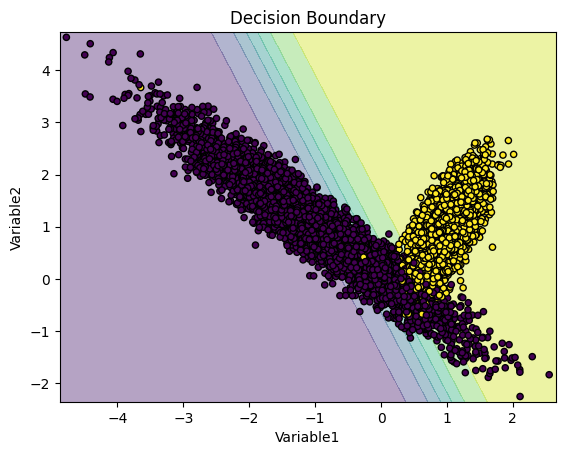

In [16]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    plt.title('Decision Boundary')
    plt.show()
    
plot_decision_boundary(X, y, model)

Neural Network in Python
========================
Now, let's build a simple neural network from scratch in Python.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Normalization
from sklearn.datasets import make_classification

In [17]:
# use the same dataset
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Variable1', 'Variable2'])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())

   Variable1  Variable2  Target
0   0.204760  -0.357665       0
1  -1.381197   1.390041       0
2   0.564351   0.467320       1
3   1.130436   0.496788       1
4   0.230647  -0.344902       0


In [18]:
# Normalize the data using keras
normalizer = Normalization(axis=-1)
normalizer.adapt(X) # Compute the mean and variance
X_normalized = normalizer(X) # Normalize the data

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dense(inputs, weights, bias, activation):
    return activation(np.dot(inputs, weights) + bias)

def sequential(inputs, layers):
    for layer in layers:
        inputs = dense(inputs, layer['weights'], layer['bias'], layer['activation'])
    return inputs

def predict(X, model):
    return np.round(sequential(X, model))   # round to get binary predictions

In [20]:
# test the model, use the weights calculated in the tensorflow model
model = [
    {'weights': hidden_weights, 'bias': hidden_biases, 'activation': sigmoid},
    {'weights': output_weights, 'bias': output_biases, 'activation': sigmoid}
]

y_pred = predict(X_normalized, model)
print(y_pred[:10])

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [22]:
# Evaluate the model
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.50000732


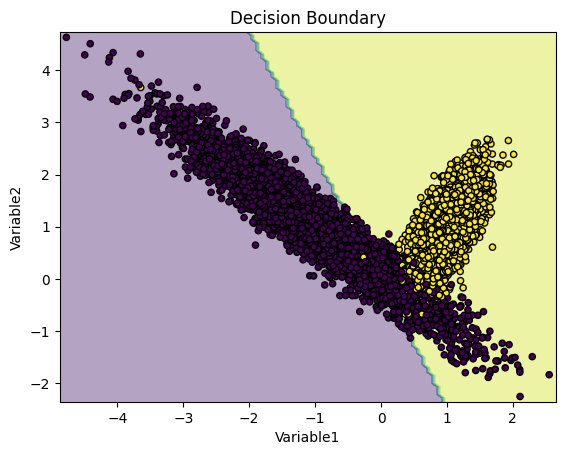

In [23]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], model)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    plt.title('Decision Boundary')
    plt.show()
    
plot_decision_boundary(X, y, model)

Hopefully, this implementation has given you a better understanding of how neural networks work.
Note that we could have used for loops to implement the neural network, but we used vectorized operations for efficiency.

Vectorization
=============
Vectorization is the process of converting an algorithm from operating on a single value at a time to operating on a set of values (a vector) at one time. This allows the algorithm to take advantage of parallelism and perform computations more efficiently.

In Python, vectorization is usually achieved using libraries like NumPy, which provide support for vectorized operations on arrays. These libraries are implemented in lower-level languages like C or Fortran, which are optimized for numerical computations.

Matrix multiplication is a common operation that can be vectorized. Instead of using nested loops to multiply two matrices, we can use the dot() function in NumPy to perform the operation in a single step.

Let's look at the general formula for matrix multiplication:
C[i, j] = sum(A[i, k] * B[k, j] for k in range(n))
This formula consists of multiple dot products, which can be computed in parallel using vectorized operations. 

Bonus: Broadcasting in NumPy
=============================
We used Z = X.W + b to calculate the output of a layer in the neural network. This operation is possible because of broadcasting in NumPy.
X.W is a matrix multiplication, with dimensions: (batch_size, input_shape) * (input_shape, output_shape) = (batch_size, output_shape)
b is a vector with dimensions: (1, output_shape)
When we add these two together, NumPy automatically broadcasts the bias vector to match the shape of the result of the matrix multiplication.

Broadcasting is applied to element-wise operations.
The basic operation is 'stretching' the smaller array to match the shape of the larger array, by replicating the elements along the missing dimensions.

More specifically: when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works its way forward. Two dimensions are compatible when:
- they are equal, or
- one of them is 1
If these conditions are not met, a ValueError is raised, indicating that the arrays have incompatible shapes.

some example:
- (m, 1) + (, 1) -> (m, 1)
- (1, n) + (1, ) -> (1, n)
- (m, 1) + (1, n) -> (m, n)

In [2]:
import numpy as np

# Example 1
a = np.array([[1], [2], [3]])
b = 2
c = a + b
print(c)
print(c.shape)

[[3]
 [4]
 [5]]
(3, 1)


Remember that the same rule applies to all element-wise operations, not just addition.

In [3]:
# Example 2
d = a * b
print(d)
print(d.shape)

[[2]
 [4]
 [6]]
(3, 1)


In [5]:
# Example 3
e = np.array([[1, 2, 3, 4]])
f = np.array([[4], [5], [6]])
g = e + f
print(e.shape)
print(f.shape)
print(g)
print(g.shape)

(1, 4)
(3, 1)
[[ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]]
(3, 4)


Note: The final shape of the result is the size that is not 1 along each axis of the inputs.

Check the mnist-binary notebook to see an example of week1's content in action.